In [2]:
#!/usr/bin/env python
import numpy as np
import scipy
import scipy.io
import scipy.ndimage
import time
import copy

import skimage.measure

import argparse

import ase.io.cube

import matplotlib.pyplot as plt

ang_2_bohr = 1.0/0.52917721067
hart_2_ev = 27.21138602
ry_2_ev = 13.605698065894

In [4]:
cube_path = "/home/kristjan/sshfs/hypatia_pr_others/bonm/POLARIZATION_PAPER/Figures/Figure2/Data_QE/FINAL_POTENTIALS_TO_USE/Interacting.cube"

In [5]:
data, atoms = ase.io.cube.read_cube_data(cube_path)

In [6]:
shape = data.shape
cell = atoms.cell # ang
dv = cell/shape   # ang

dv_inv = np.linalg.inv(dv)

In [7]:
i_arr = np.arange(0, shape[0])
j_arr = np.arange(0, shape[1])
k_arr = np.arange(0, shape[2])

i_grid, j_grid, k_grid = np.meshgrid(i_arr, j_arr, k_arr, indexing='ij')

ei_grid = np.einsum('ijk,l', i_grid, dv[0])
ej_grid = np.einsum('ijk,l', j_grid, dv[1])
ek_grid = np.einsum('ijk,l', k_grid, dv[2])

x_grid = ei_grid[:, :, :, 0] + ej_grid[:, :, :, 0] + ek_grid[:, :, :, 0]
y_grid = ei_grid[:, :, :, 1] + ej_grid[:, :, :, 1] + ek_grid[:, :, :, 1]
z_grid = ei_grid[:, :, :, 2] + ej_grid[:, :, :, 2] + ek_grid[:, :, :, 2]

In [8]:
cell

array([[ 7.92257661e+00,  6.45807868e-02,  4.64353002e-03],
       [-4.42921325e-03,  7.92243373e+00, -6.44379089e-02],
       [-6.44379089e-02,  4.00057971e-03,  7.92243373e+00]])

In [9]:
for at in atoms:
    print(at)

Atom('Fe', [0.03866327453542593, 3.937191161340828, 7.8487505661335755], index=0)
Atom('O', [7.87571849513833, 2.0782524760092693, 3.443061886609841], index=1)
Atom('Fe', [0.06916081553464122, 7.8962553335031025, 3.8547125429479268], index=2)
Atom('O', [6.107211432497237, 0.4863572490394362, 0.08147741511051462], index=3)
Atom('Fe', [3.9984688239697, 7.931338195031853, 7.8182429707673595], index=4)
Atom('O', [6.076047128212711, 7.8220641594048415, 3.39396694172257], index=5)
Atom('Fe', [0.0369323358796716, 7.8986154638622175, 7.816418367745335], index=6)
Atom('O', [3.912169016939317, 6.007897041150247, 3.4083896665964875], index=7)
Atom('O', [6.07230161191634, 4.448410743264185, 4.0098281419716635], index=8)
Atom('O', [4.512185063972498, 3.84732893332893, 1.8493023683271916], index=9)
Atom('O', [4.526805701123165, 6.011277425171328, 0.034999780706692456], index=10)
Atom('O', [7.887012195166183, 4.461952917259725, 1.8470459567013473], index=11)
Atom('Bi', [5.816784691555115, 5.751950958

In [10]:
pos = atoms[13].position # central iron
pos_ijk = np.dot(pos, dv_inv) # position in lattice coordinate system
pos_ijk_int = np.round(pos_ijk).astype(int) # round to the nearest pixel
pos_ijk_int

array([69, 67, 67])

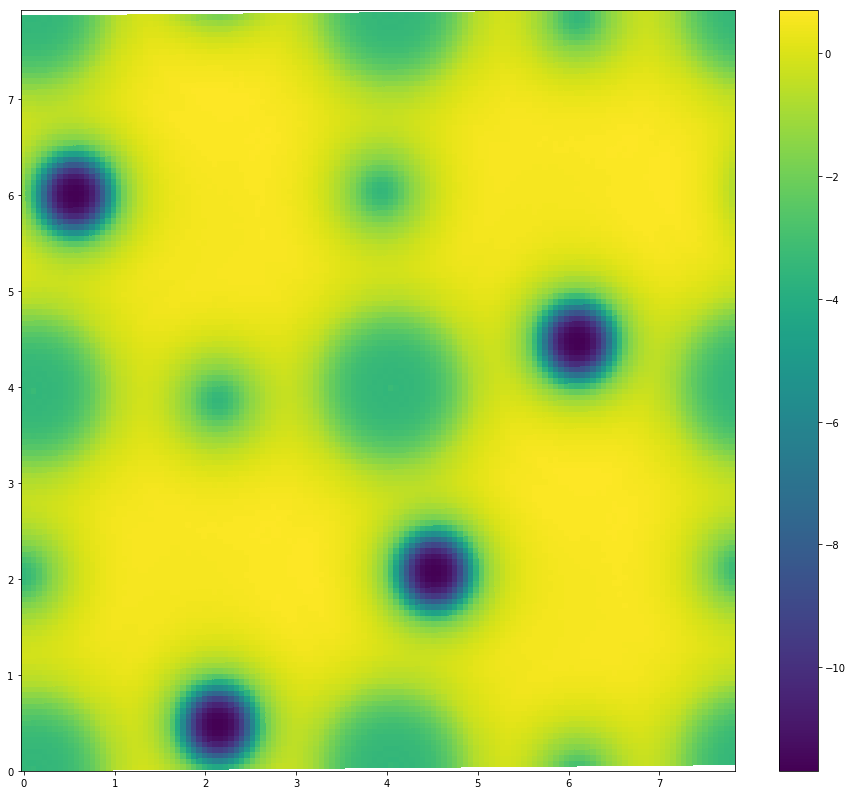

In [11]:
plt.figure(figsize=(16, 14))
plt.pcolormesh(x_grid[:, :, 67], y_grid[:, :, 67], data[:, :, 67])
plt.colorbar()
plt.show()

In [12]:
np.diagonal(data)

array([[-3.4967, -3.4844, -3.4383, ..., -3.3667, -3.4165, -3.4382],
       [-3.4426, -3.4383, -3.458 , ..., -3.3564, -3.3826, -3.4701],
       [-3.4673, -3.4677, -3.4517, ..., -3.3088, -3.3724, -3.4282],
       ...,
       [-3.4554, -3.453 , -3.4783, ..., -3.3332, -3.3698, -3.4512],
       [-3.4446, -3.455 , -3.4548, ..., -3.3618, -3.3903, -3.4635],
       [-3.4979, -3.4951, -3.4436, ..., -3.3652, -3.4175, -3.4427]])

In [13]:
pot = np.einsum('iii->i', data)

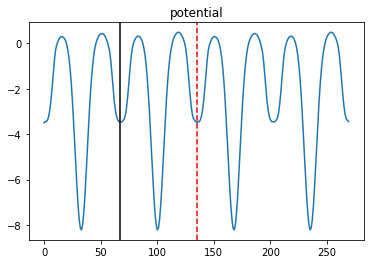

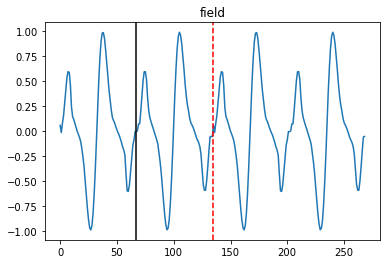

In [16]:

plt.plot(np.hstack([pot, pot]))
plt.axvline(67, color='k')
plt.axvline(135, color='r', linestyle='--')
plt.title('potential')
#plt.ylim([0.0, 0.5])
plt.show()

plt.plot(np.diff(np.hstack([pot, pot])))
plt.axvline(67, color='k')
plt.axvline(135, color='r', linestyle='--')
plt.title('field')
plt.show()